In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D,MaxPooling2D,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.preprocessing import image

In [ ]:
img_size = [64,64,3]

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/dataset/train',
                                                 target_size = (64, 64),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')


Found 557 images belonging to 2 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/dataset/test' ,
                                             target_size = (64,64),
                                             batch_size = 16,
                                             class_mode = 'categorical')

Found 140 images belonging to 2 classes.


In [ ]:
CNN_Classifier = Sequential()



# step 1 Convolution ##
CNN_Classifier.add(Conv2D(32 , (3,3),input_shape = (64,64,3),activation = 'relu'))

## step 2 Maxpooling ##
CNN_Classifier.add(MaxPooling2D(pool_size = (2,2)))

## step 3 Flattening ##
CNN_Classifier.add(Flatten())

## Full Connection 
CNN_Classifier.add(Dense(units = 1, activation = 'sigmoid'))
CNN_Classifier.add(Dense(units = 2 , activation = 'softmax'))

##Compiling the CNN##
CNN_Classifier.compile(optimizer = 'adam',loss ='categorical_crossentropy', metrics = ['accuracy'])


In [ ]:
CNN_Classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 30752)             0         
                                                                 
 dense (Dense)               (None, 1)                 30753     
                                                                 
 dense_1 (Dense)             (None, 2)                 4         
                                                                 
Total params: 31,653
Trainable params: 31,653
Non-trainable params: 0
____________________________________________________

In [ ]:
history = CNN_Classifier.fit(
    training_set,
    steps_per_epoch=len(training_set),
    epochs=15,
    validation_data=test_set,
    validation_steps=len(test_set)
)

Epoch 1/15
35/35 [==============================] - 277s 8s/step - loss: 0.6944 - accuracy: 0.4919 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/15
35/35 [==============================] - 11s 325ms/step - loss: 0.6933 - accuracy: 0.4991 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/15
35/35 [==============================] - 13s 389ms/step - loss: 0.6932 - accuracy: 0.4991 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/15
35/35 [==============================] - 13s 386ms/step - loss: 0.6932 - accuracy: 0.4991 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/15
35/35 [==============================] - 13s 382ms/step - loss: 0.6932 - accuracy: 0.5009 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 6/15
35/35 [==============================] - 13s 381ms/step - loss: 0.6932 - accuracy: 0.5009 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 7/15
35/35 [==============================] - 11s 315ms/step - loss: 0.6932 - accuracy: 0.5009 - val_loss: 0.6931 - val_accuracy: 0.5000
E

In [ ]:
# save it as a h5 file
CNN_Classifier.save('Cat_Dog_classifier.h5')   # Dog:1 , Cat:0


In [ ]:
CNN_Classifier =load_model("Cat_Dog_classifier.h5")


In [ ]:
pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import cv2

In [ ]:
from google.colab.patches import cv2_imshow 
import matplotlib.image as mpimg
from PIL import Image

Path of the image to be predicted: /content/drive/MyDrive/dataset/test/dogs/dog_130.jpg


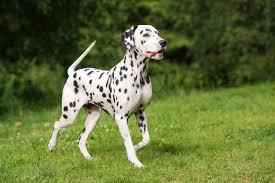

1/1 [==============================] - 0s 22ms/step
[[0.50077796 0.49922204]]
0
The image represents a Dog


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (64,64))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,64,64,3])

input_prediction = CNN_Classifier.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 1:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')

Path of the image to be predicted: /content/drive/MyDrive/dataset/test/cats/cat_1.jpg


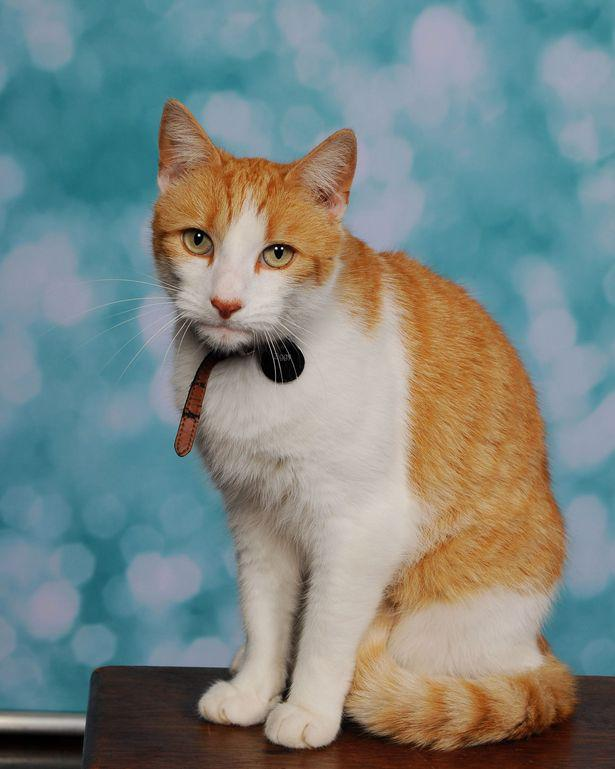

1/1 [==============================] - 0s 28ms/step
[[0.50077796 0.49922204]]
0
The image represents a Cat


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (64,64))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,64,64,3])

input_prediction = CNN_Classifier.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')